In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from nnpde2diff1d import NNPDE2DIFF1D
from pde2diff1d import PDE2DIFF1D

In [2]:
%%javascript
MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

## The problem

### Create the training data.

In [3]:
nx = 10
nt = 11
xt = np.linspace(0, 1, nx)
tt = np.linspace(0, 1, nt)
x_train = np.array(list(zip(np.tile(xt, nt), np.repeat(tt, nx))))

### Read the differential equation.

In [6]:
eq_name = 'diff1d_sine'
eq = PDE2DIFF1D(eq_name)

### Compute the analytical solution.

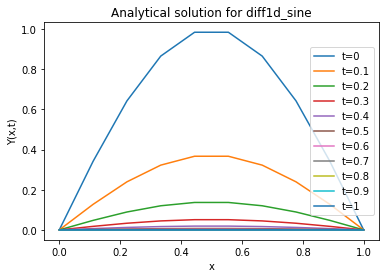

In [7]:
n = nx*nt
Ya = np.zeros(n)
for i in range(n):
    Ya[i] = eq.Yaf(x_train[i])
Ya = Ya.reshape((nt, nx))
for i in range(nt):
    plt.plot(xt, Ya[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Y(x,t)')
plt.legend(loc='right')
plt.title('Analytical solution for %s' % eq_name);

## Newton-CG (default)

In [9]:
net1 = NNPDE2DIFF1D(eq)
trainalg = 'Newton-CG'
options = {}
options['disp'] = True
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net1.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net1.res)

         Current function value: 11.310367
         Iterations: 45
         Function evaluations: 62
         Gradient evaluations: 2273
         Hessian evaluations: 0
4min 36s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
     fun: 11.310367007159094
     jac: array([-0.51990492,  0.12301619, -0.02144737,  0.70598198, -0.44870485,
       -0.30623858,  0.15170906,  0.0780612 ,  0.19467028, -0.03094833,
        2.55467009,  0.02292893,  0.34948479, -0.30525898,  0.05631399,
        0.00289826,  0.5812701 ,  1.0659584 , -2.37739054, -1.23822483,
        2.19334088, -0.09007223,  0.06842379,  0.24339361, -1.52648868,
       -1.43171125, -0.17039483,  0.51662866, -2.09155572, -2.37545924,
        0.76492395, -0.52080556,  0.06396074, -0.27842147,  0.27524021,
        0.28668   ,  0.25749823, -0.55502442,  0.37175844, -0.86043649])
 message: "Warning: CG iterations didn't converge.  The Hessian is not positive definite."
    nfev: 62
    nhev: 0
     nit: 45
    njev: 2273
  sta

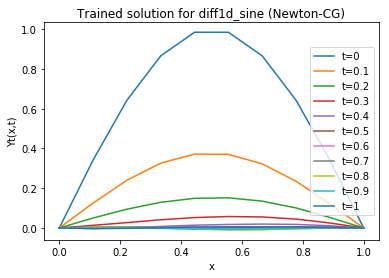

In [10]:
Yt1 = net1.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s)' % (eq_name, trainalg));

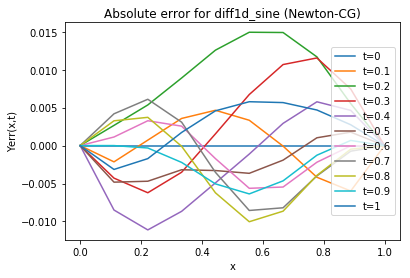

In [11]:
Y_err1 = Yt1 - Ya
for i in range(nt):
    plt.plot(xt, Y_err1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s)' % (eq_name, trainalg));